In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sbpcreator as sc
import numpy as np
import os
import copy
import sys
sys.path.append("..\\")
from pythonGUI.config import cfg
SBPFOLDER = cfg.shopbot.sbpFolder

In [9]:
slideW = 25 # mm
slideH = 75 # mm
margin = 5 # mm
#spacing = (slideH-2*margin)/12 # mm
spacing=5
nd = 0.603 + 0.152*2 # mm # nozzle = 0.603 mm ID x 0.152 mm OD x 1.5" tall (20 gauge needle)
downdisp = 0
wait1=0.5
wait2=0.5

In [10]:
dv = sc.defVars(slideW=slideW, slideH = slideH, margin=margin, spacing=spacing, nd=nd, downdisp=downdisp)
dv.setUnits()
dv.setSpeeds(m=5, j=20)
# dv.turnOn(0);

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\underSlide.sbp


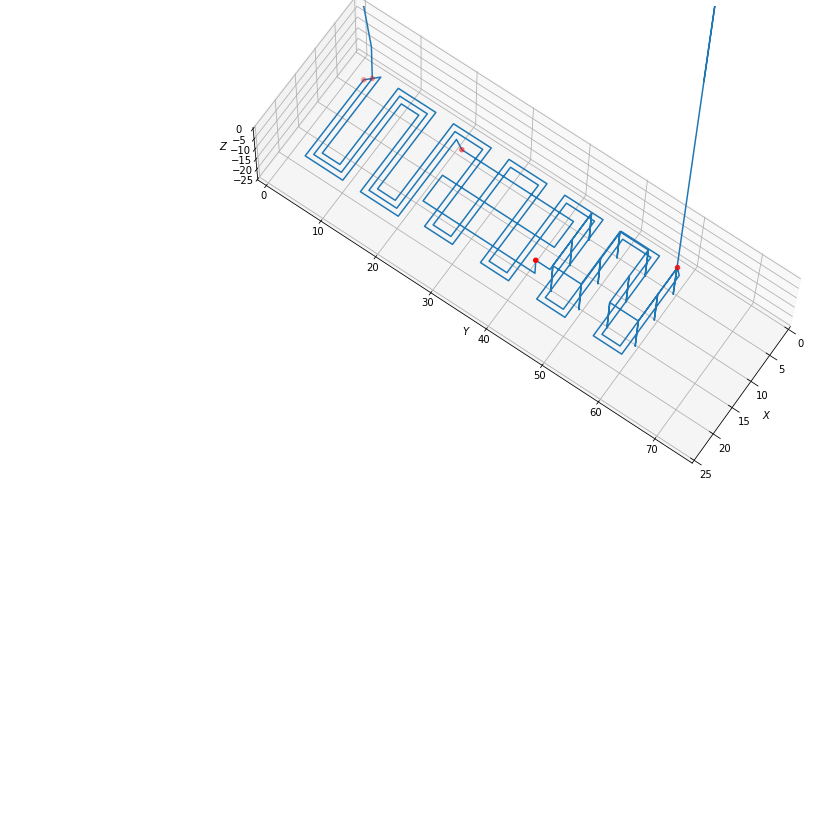

In [17]:
total = dv

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-25+2*&margin'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH, margin, 3)
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.x0 = sc.p(zz2.x0, '-&nd')
zz2.y0 = sc.p(zz2.y0, '-&nd')
zz2.longdir = '+x'
zz2.shortdir = '-y'
zz2.spacing1 = '(&spacing+2*&nd)'
zz2.spacing2 = '(&spacing-2*&nd)'
zz2.updateReps(slideH, margin, 3)
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.x0 = sc.p(zz3.x0, '2*&nd')
zz3.y0 = sc.p(zz3.y0, '-2*&nd')
zz3.longdir = '+x'
zz3.shortdir = '+y'
zz3.spacing1 = '(&spacing-2*&nd)'
zz3.spacing2 = '(&spacing+2*&nd)'
zz3.reps=int(zz2.reps/3)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(zz4.x0, '&nd')
zz4.y0 = sc.p(zz4.y0, '(&spacing-2*&nd)/2')
zz4.longdir = '+y'
zz4.shortdir = '+x'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps = 3
zz4.width = '4*&spacing'
total = total + zz4

v1 = sc.verts(zigzag=zz2, start=3, end=0, disp='&nd', lastPt=total)

v1.downdisp = '&downdisp'
v1.setSpacing(5)
v1.longlist = [sc.p(i,2) for i in v1.longlist]
total = total + v1
total.turnOff(3)
total.withdraw()
total.plot()
total.export(os.path.join(SBPFOLDER, 'underSlide.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideHorizSlide.sbp


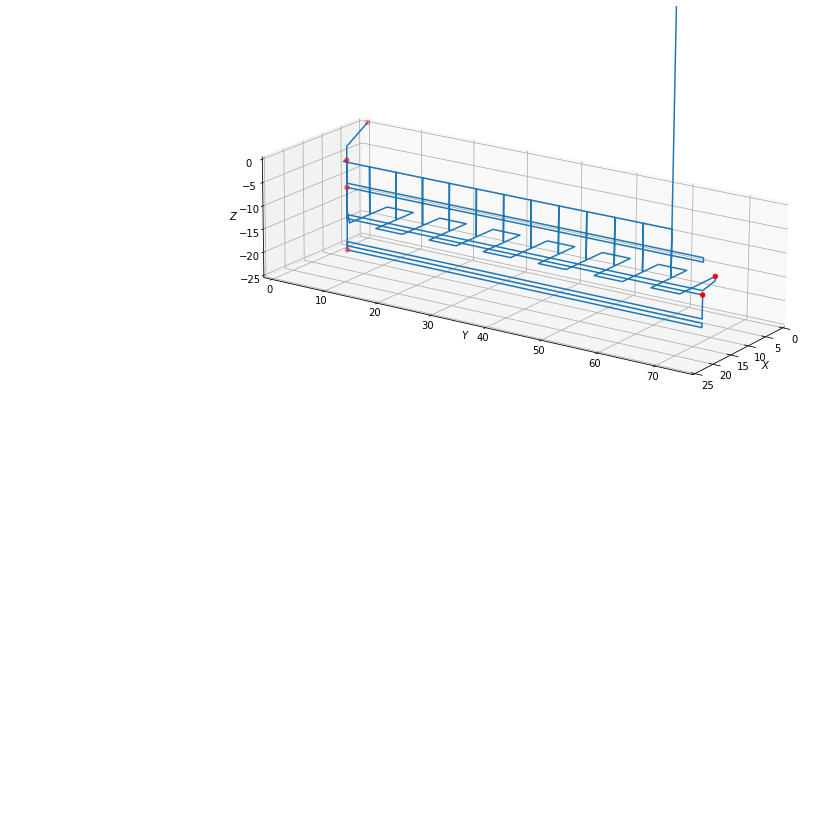

In [18]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = xmed
zz.y0 = '&margin'
zz.z0 = '(-&slideW+&margin/2)'
zz.longdir = '+y'
zz.shortdir = '+z'
zz.spacing1 = '&nd'
zz.spacing2 = '&nd'
zz.width = '(&slideH-2*&margin)'
zz.reps=3
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.z0 = sc.p(zz2.z0, '&spacing')
zz2.longdir = '-y'
zz2.shortdir = '+z'
zz2.spacing1 = '&nd'
zz2.spacing2 = '&nd'
zz2.reps=2
zz2.width = '(&slideH-2*&margin)'
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.z0 = sc.p(zz3.z0, '&nd')
# zz3.x0 = sc.p(xmed, '-&slideW/2+&margin')
zz3.x0 = sc.p(xmed, '-&margin')
zz3.y0 = sc.p(zz3.y0, '-&nd')
zz3.longdir = '+x'
zz3.shortdir = '-y'
zz3.spacing1 = '&spacing'
zz3.spacing2 = '&spacing'
# zz3.width = '&slideW-2*&margin'
zz3.width = '2*&margin'
zz3.updateReps(slideH, margin, 1)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = xmed
zz4.y0 = '&margin'
zz4.z0 = sc.p(zz4.z0, '&spacing')
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&nd'
zz4.spacing2 = '&nd'
zz4.reps=2
zz4.width = '&slideH-2*&margin'
total = total + zz4

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['2*&margin', '&slideH-&margin'], const=sc.p(xmed, '&nd'), spacing1='&spacing')
v1.setZBounds(v1.cp[2], '&spacing')
v1.downdisp = '&downdisp'

total = total + v1


total.turnOff(3)
total.withdraw()

total.plot(ele=20)


total.export(os.path.join(SBPFOLDER, 'sideHorizSlide.sbp'), [])
# print(total.convertFile('spacing'))

<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

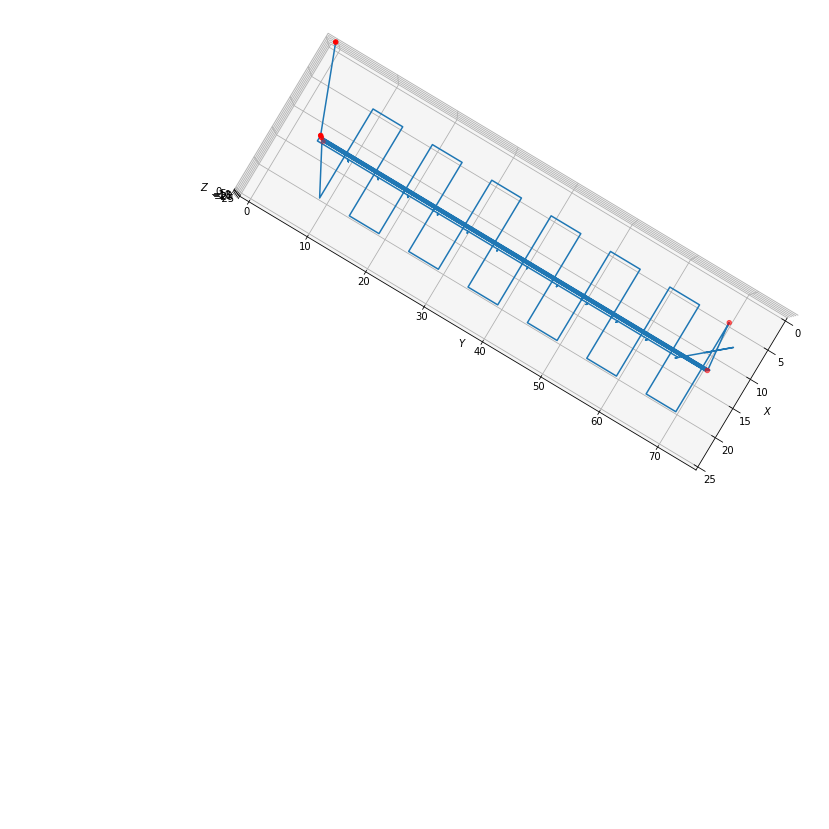

In [37]:
total.plot(ele=90)

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideVertSlide.sbp


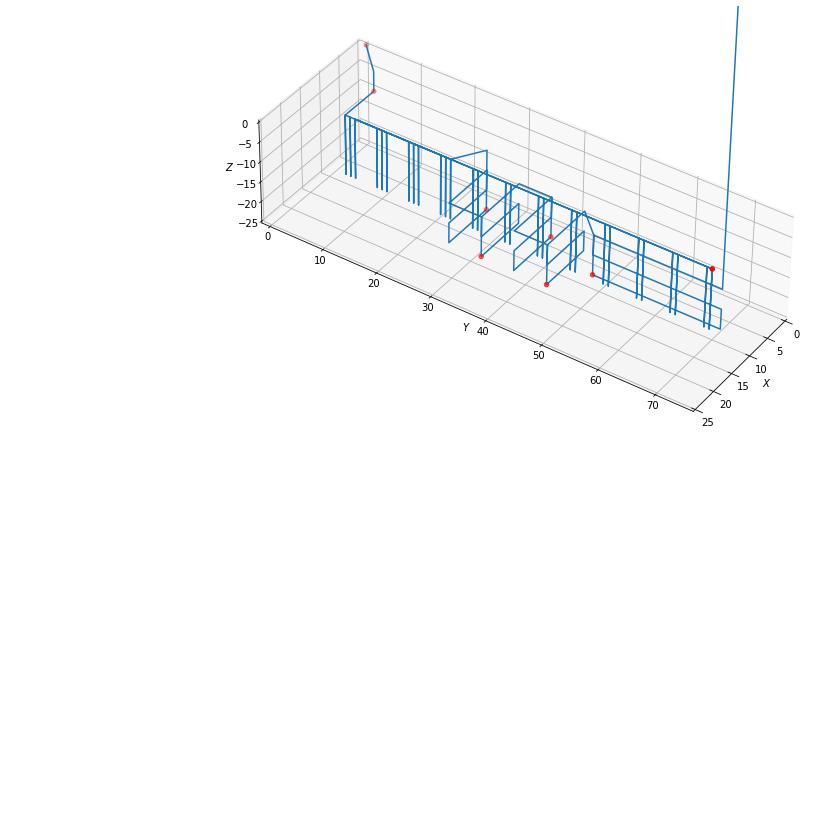

In [19]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.m2(5,5)
total.turnOn(3)

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&margin', '&slideH'], const=xmed, spacing2='&nd', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

v2 = sc.verts(lastPt=total)
v2.singleUpDownRow(direc='+y', longlist=['&margin+2*&nd', '35'], const=xmed, spacing1='&spacing+&nd')
v2.zmax = '-&margin'
v2.zmin = '-&slideW+&margin'
v2.downdisp = 0
total = total + v2

for i in [8,10,12,14]:
    zz3 = sc.zigzag(lastPt=total)
    zz3.z0 = '&margin-&slideW'
    
    
    zz3.y0 = sc.p(v1.longlist[i], '-&nd')
    if i==8 or i==12:
        zz3.longdir = '+x'
        zz3.x0 = sc.p(v1.shortlist[0], '-&spacing')
    else:
        zz3.longdir = '-x'
        zz3.x0 = sc.p(v1.shortlist[0], '&spacing')
    zz3.shortdir = '+z'
    zz3.spacing1 = '&spacing'
    zz3.spacing2 = '&spacing'
    zz3.width = '2*&spacing'
    zz3.updateReps(slideW, margin, 1)
    total = total + zz3
    
zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[16], '-&spacing/2')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4




total.turnOff(3)
total.withdraw()
total.plot(ele=40)
total.export(os.path.join(SBPFOLDER, ,'sideVertSlide.sbp'), [])
# print(total.convertFile('spacing'))

<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

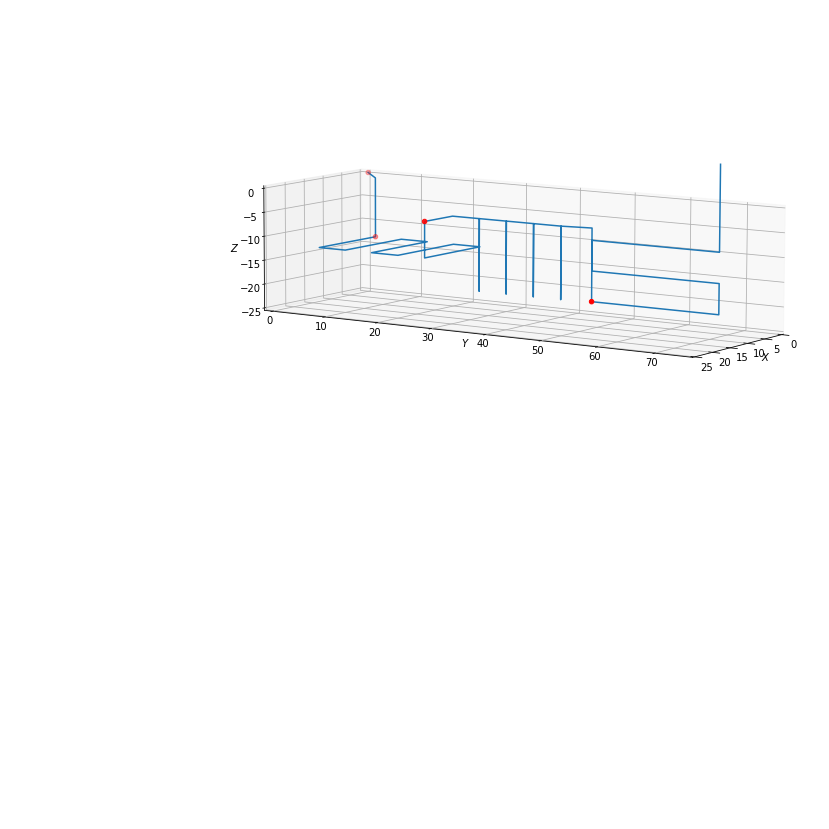

In [5]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
# total.withdraw()
total.plot(ele=10)
#total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\singleLinesNoZig_fullLines.sbp


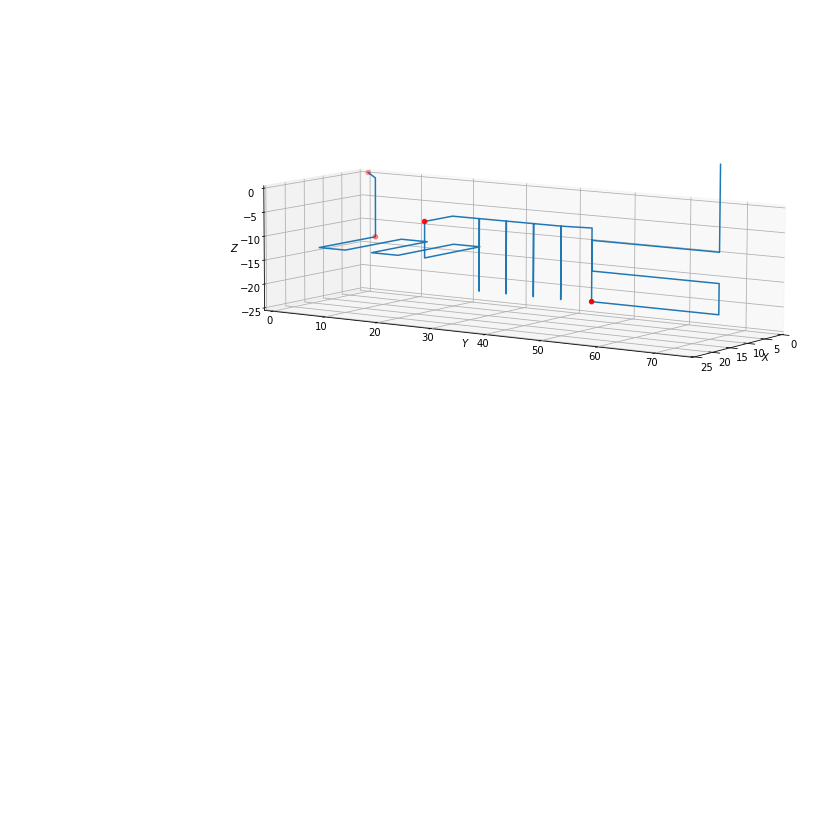

In [11]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
# total.withdraw()
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig_fullLines.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\software\SBP files\singleLinesPics.sbp


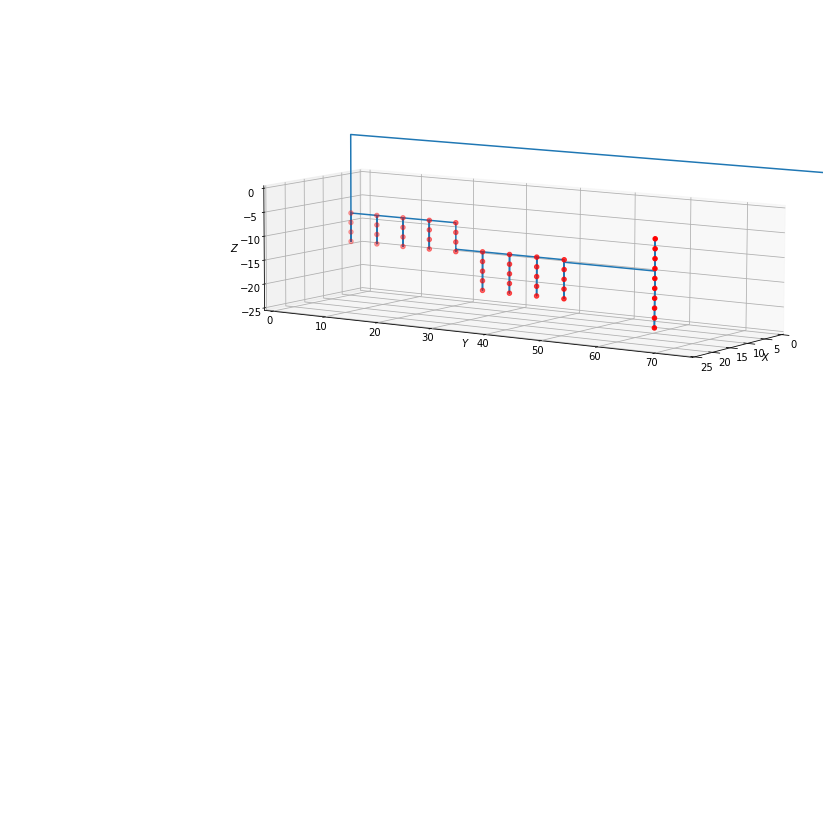

In [41]:
import copy

total = copy.deepcopy(dv)

total.turnOn(3)


pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -4, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
# l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -10, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
# yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics2.sbp


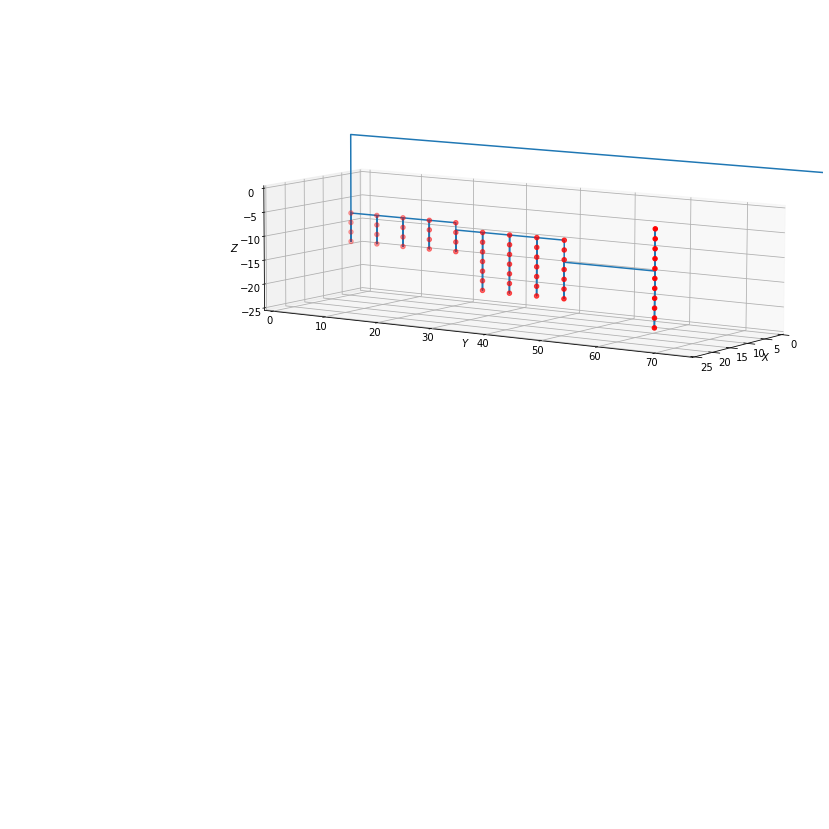

In [10]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -2, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics2.sbp'), [])


In [10]:
zz4.convertPts(zz4.positions)

array([[ 11.593,  50.   ,  -5.   ],
       [ 11.593,  50.   , -20.   ],
       [ 11.593,  72.5  , -20.   ],
       [ 11.593,  72.5  , -13.75 ],
       [ 11.593,  50.   , -13.75 ],
       [ 11.593,  50.   ,  -7.5  ],
       [ 11.593,  72.5  ,  -7.5  ]])

Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics4.sbp


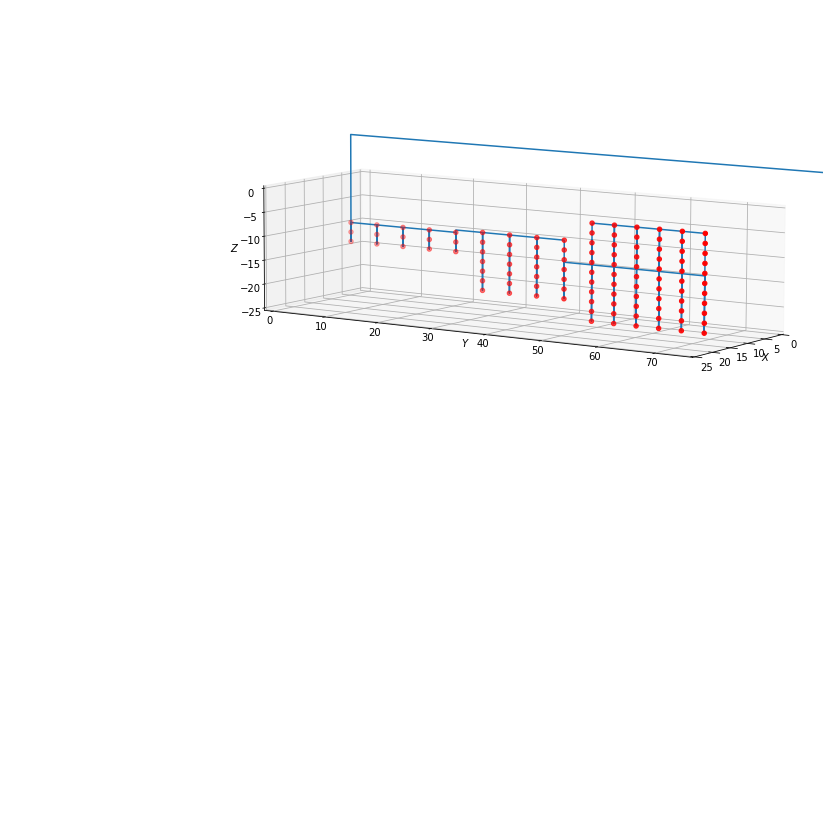

In [8]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 4 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics4.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics5.sbp


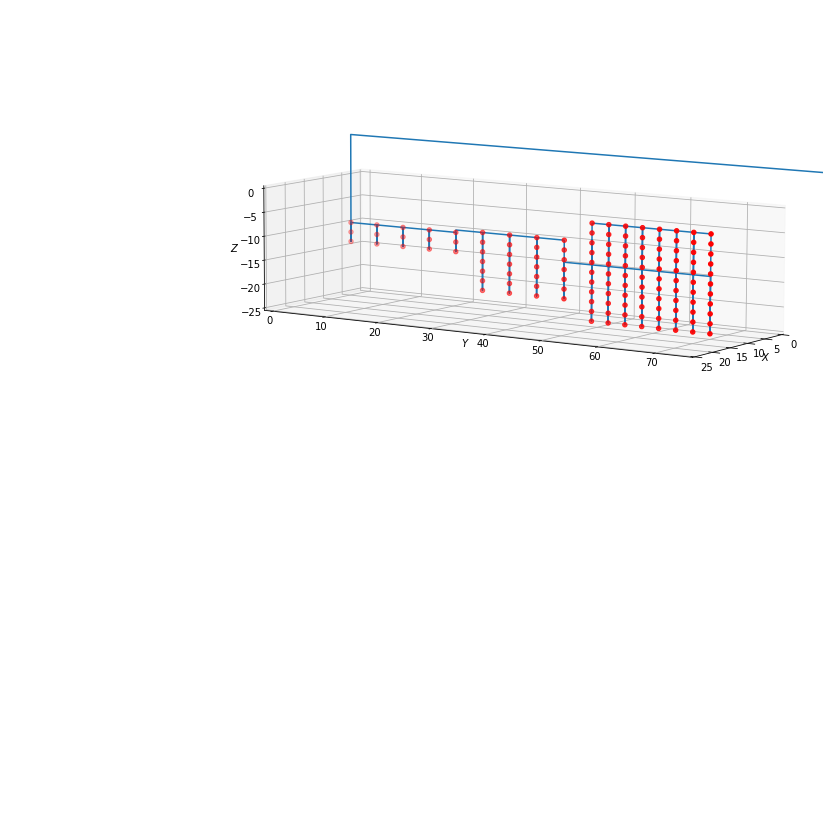

In [7]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 3 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics5.sbp'), [])
